<a href="https://colab.research.google.com/github/Haritha-Murukutla/Fusion/blob/main/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD AND MERGE DATA FROM ALL 12 DATASETS**

```
# This is formatted as code
```






In [2]:
files = [f'2023{str(i).zfill(2)}-divvy-tripdata.csv' for i in range (1,13)]
df = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)


In [ ]:
df.head()

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB
None


# **DATA CLEANING**

CHECKING FOR SPELLING ERRORS


In [4]:
df["rideable_type"].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [5]:
df["member_casual"].unique()

array(['member', 'casual'], dtype=object)

GETTING RID OF COLUMNS NOT USED FOR ANALYSIS


In [6]:
columns_to_drop = ['start_lat', 'start_lng', 'end_lat', 'end_lng']
df.drop(columns=columns_to_drop, inplace=True)

  DISCARDING ROWS WITH EMPTY VALUES

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64

REMOVING DUPLICATES

In [8]:
df.drop_duplicates(inplace=True)

CONVERT DATA COLUMNS TO DATETIME


In [9]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

AFTER BASIC CLEANING


In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,member


ADDING ADDITIONAL COLUMNS REQUIRED FOR ANALYSIS

In [11]:
df["trip_route"] = df["start_station_name"] + " to " + df["end_station_name"]

In [12]:
df['trip_duration']=(df['ended_at']-df['started_at']).dt.total_seconds()/60

In [13]:
df=df[df['trip_duration']>=0]

In [14]:
df["start_time"] = df["started_at"].dt.time
df["start_date"] = df["started_at"].dt.date
df["end_time"] = df["ended_at"].dt.time
df["end_date"] = df["ended_at"].dt.date

In [15]:
df['hour'] = df.apply(lambda time: time["start_time"].hour, axis=1)
df["date"] = pd.to_datetime(df["start_date"])
df["month"] = df["date"].dt.month_name()

REMOVING EXTRA COLUMNS

In [16]:
df = df.drop(columns=["start_station_name", "end_station_name","started_at", "ended_at"])

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4331757 entries, 0 to 5719876
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ride_id           object        
 1   rideable_type     object        
 2   start_station_id  object        
 3   end_station_id    object        
 4   member_casual     object        
 5   trip_route        object        
 6   trip_duration     float64       
 7   start_time        object        
 8   start_date        object        
 9   end_time          object        
 10  end_date          object        
 11  hour              int64         
 12  date              datetime64[ns]
 13  month             object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 495.7+ MB
None


PREPARED SAMPLE DATA

In [18]:
df.head()

,ride_id,rideable_type,start_station_id,end_station_id,member_casual,trip_route,trip_duration,start_time,start_date,end_time,end_date,hour,date,month
0,F96D5A74A3E41399,electric_bike,TA1309000058,202480.0,member,Lincoln Ave & Fullerton Ave to Hampden Ct & Di...,10.850000,20:05:42,2023-01-21,20:16:33,2023-01-21,20,2023-01-21,January
1,13CB7EB698CEDB88,classic_bike,TA1309000037,TA1308000002,member,Kimbark Ave & 53rd St to Greenwood Ave & 47th St,8.483333,15:37:36,2023-01-10,15:46:05,2023-01-10,15,2023-01-10,January
2,BD88A2E670661CE5,electric_bike,RP-005,599,casual,Western Ave & Lunt Ave to Valli Produce - Evan...,13.233333,07:51:57,2023-01-02,08:05:11,2023-01-02,7,2023-01-02,January
3,C90792D034FED968,classic_bike,TA1309000037,TA1308000002,member,Kimbark Ave & 53rd St to Greenwood Ave & 47th St,8.766667,10:52:58,2023-01-22,11:01:44,2023-01-22,10,2023-01-22,January
4,3397017529188E8A,classic_bike,TA1309000037,TA1308000002,member,Kimbark Ave & 53rd St to Greenwood Ave & 47th St,15.316667,13:58:01,2023-01-12,14:13:20,2023-01-12,13,2023-01-12,January


# **EXPLORATORY DATA ANALYSIS (EDA)**

PERCENTAGE OF CASUAL RIDERS AND MEMBERS

In [19]:
df["member_casual"].value_counts(normalize=True) * 100

member_casual
member    64.637051
casual    35.362949
Name: proportion, dtype: float64

PREFERENCE IN RIDEABLE TYPES


- GENERAL PREFERENCE

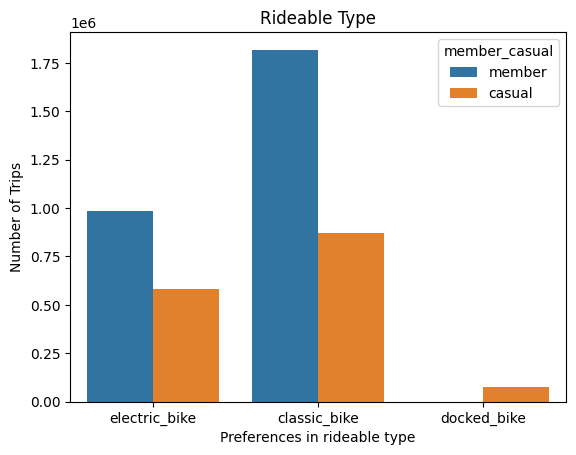

In [20]:
ax = sns.countplot(data=df, x="rideable_type", hue="member_casual")
ax.set(xlabel="Preferences in rideable type",
       ylabel="Number of Trips",
       title="Rideable Type")
plt.show()

- BIKE PREFERENCES OF MEMBERS

In [21]:
df[df["member_casual"] == "member"]["rideable_type"].value_counts(normalize=True) * 100

rideable_type
classic_bike     64.919783
electric_bike    35.080217
Name: proportion, dtype: float64

- BIKE PREFERENCES OF CASUAL RIDERS

In [22]:
df[df["member_casual"] == "casual"]["rideable_type"].value_counts(normalize=True) * 100

rideable_type
classic_bike     56.990724
electric_bike    38.032245
docked_bike       4.977031
Name: proportion, dtype: float64

TRIP DURATION OF DIFFERENT TYPES OF RIDERS

- GENERAL COMPARISON

In [23]:
stats = df[["member_casual", "trip_duration"]] \
.groupby(["member_casual"]) \
.agg({"trip_duration": ["mean", "std", "max", "min"]}).reset_index()
stats.columns =  stats.columns.droplevel()
stats = stats.rename(columns={'': "member_casual"})
stats

,member_casual,mean,std,max,min
0,casual,22.938835,52.182761,12136.300000,0.0
1,member,12.131253,22.006339,1497.866667,0.0


In [24]:
casual_rider_mean = stats[stats["member_casual"] == "casual"]["mean"].values[0]
member_mean = stats[stats["member_casual"] == "member"]["mean"].values[0]

diff = casual_rider_mean / member_mean

print(f"Casual rider's trips are {diff:.2f} times longer than member's trips")

Casual rider's trips are 1.89 times longer than member's trips


PREFERRED ROUTES

In [25]:
routes = df[["member_casual", "trip_route", "ride_id"]] \
.groupby(["member_casual", "trip_route"]) \
.agg({"ride_id": ["count"]}).reset_index()


In [26]:
routes["count"] = routes["ride_id"]["count"]
routes = routes[["member_casual", "trip_route", "count"]].sort_values(by="count", ascending=False)
routes = routes.groupby("member_casual").head(10)

- PREFERRED ROUTES BY CASUAL RIDERS

In [27]:
routes[routes["member_casual"] == "casual"][["trip_route", "count"]]

,trip_route,count
,,
107086,Streeter Dr & Grand Ave to Streeter Dr & Grand...,8653
38752,DuSable Lake Shore Dr & Monroe St to DuSable L...,6732
38972,DuSable Lake Shore Dr & Monroe St to Streeter ...,4626
73547,Michigan Ave & Oak St to Michigan Ave & Oak St,4260
75252,Millennium Park to Millennium Park,3426
39869,Dusable Harbor to Dusable Harbor,2799
77017,Montrose Harbor to Montrose Harbor,2529
106844,Streeter Dr & Grand Ave to DuSable Lake Shore ...,2352
39151,DuSable Lake Shore Dr & North Blvd to DuSable ...,2043


- PREFERRED ROUTES BY MEMBERS

In [28]:
routes[routes["member_casual"] == "member"][["trip_route", "count"]]

,trip_route,count
,,
170941,Ellis Ave & 60th St to University Ave & 57th St,5208
138688,Calumet Ave & 33rd St to State St & 33rd St,5202
244016,State St & 33rd St to Calumet Ave & 33rd St,5145
249908,University Ave & 57th St to Ellis Ave & 60th St,4935
170865,Ellis Ave & 60th St to Ellis Ave & 55th St,4929
170638,Ellis Ave & 55th St to Ellis Ave & 60th St,4525
203288,Loomis St & Lexington St to Morgan St & Polk St,3445
214058,Morgan St & Polk St to Loomis St & Lexington St,3163
203552,MLK Jr Dr & 29th St to State St & 33rd St,2528


RUSH HOUR ANALYSIS

In [29]:
hours_stat = df[["hour", "member_casual"]].groupby(["member_casual", "hour"]).agg({"hour": ["count"]}).reset_index()
hours_stat.columns = hours_stat.columns.droplevel()
hours_stat.columns.values[0] = "member_casual"
hours_stat.columns.values[1] = "hour"


RUSH HOUR VISUALIZATION

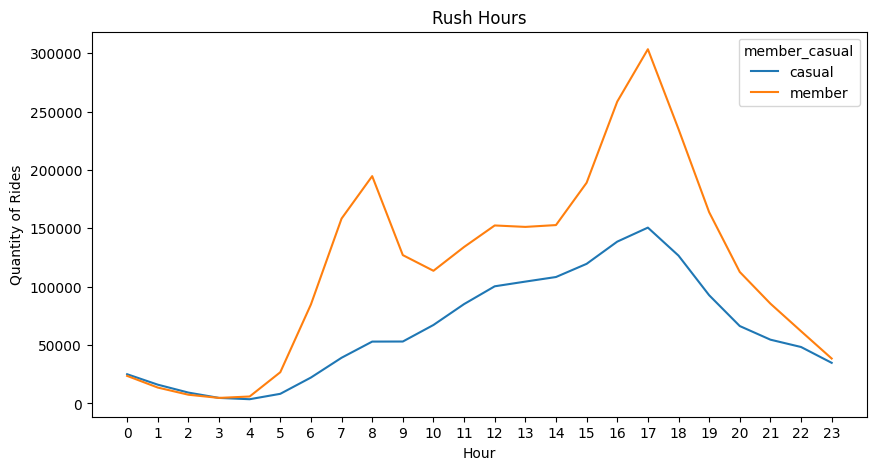

In [30]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot(data=hours_stat, x = "hour", y = "count", hue = "member_casual")

ax.set(xlabel="Hour",
       ylabel="Quantity of Rides",
       xticks = np.arange(df["hour"].min(), df["hour"].max() + 1, 1.0),
       title="Rush Hours")

plt.show()

SEASONALITY

In [31]:
months_stat = df[["month", "member_casual"]].groupby(["member_casual", "month"]).agg({"month": ["count"]}).reset_index()
months_stat.columns = months_stat.columns.droplevel()
months_stat.columns.values[0] = "member_casual"
months_stat.columns.values[1] = "month"
months_stat.sort_values(by="month")

,member_casual,month,count
0,casual,April,110537
12,member,April,213657
1,casual,August,233892
13,member,August,351061
2,casual,December,36686
14,member,December,130453
3,casual,February,32776
15,member,February,116784
4,casual,January,29621
16,member,January,118663


In [32]:
months_ordered = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

months_stat["month"] = pd.Categorical(months_stat["month"], months_ordered)

VISUALIZATION OF SEASONALITY

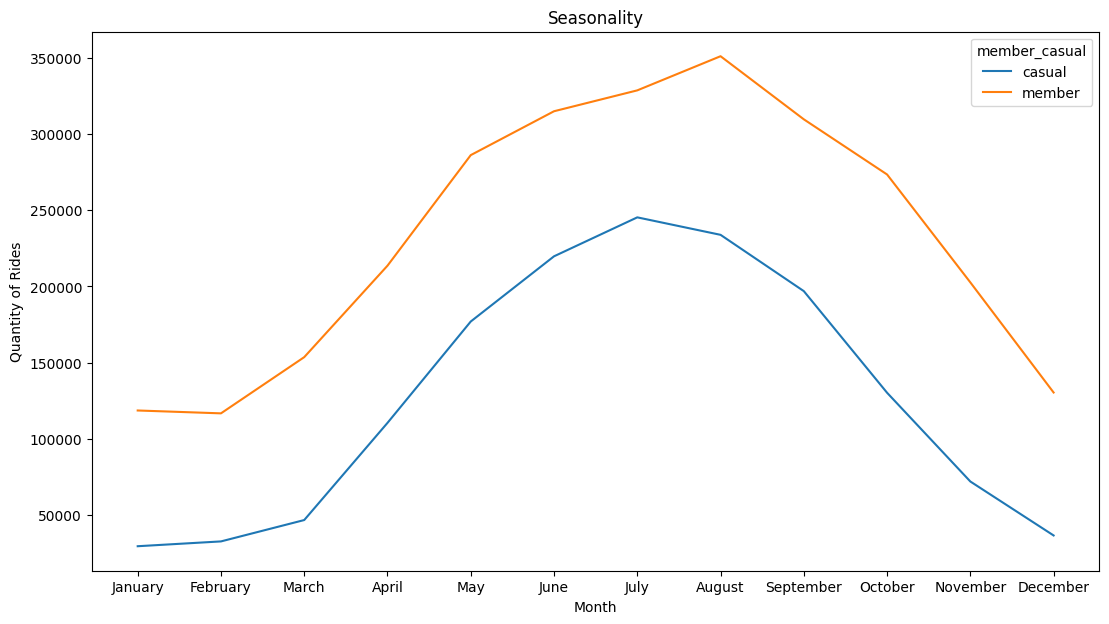

In [33]:
plt.figure(figsize=(13, 7))

ax = sns.lineplot(data=months_stat, x = "month", y = "count", hue = "member_casual")

ax.set(xlabel="Month",
       ylabel="Quantity of Rides",
       title="Seasonality")

plt.show()

# **RECOMMENDATIONS BASED ON ANALYSIS**

In [34]:
print("Recommendations:")
print("1. Introduce a summer pass to attract casual riders during peak riding season.")
print("2. Create a weekend pass targeting casual riders who use bikes for leisure activities.")
print("3. Promote the health benefits and environmental advantages of biking to encourage more commuters to become annual members.")

Recommendations:
1. Introduce a summer pass to attract casual riders during peak riding season.
2. Create a weekend pass targeting casual riders who use bikes for leisure activities.
3. Promote the health benefits and environmental advantages of biking to encourage more commuters to become annual members.
